## Introduction to Missing Data 

### Trade-Offs in Missing Data Conventions


### Missing Data in Pandas




### None: Pythonic missing data


In [209]:
import numpy as np
import pandas as pd

In [210]:
vals1=np.array([1,None,3,4])
vals1

array([1, None, 3, 4], dtype=object)

In [211]:
for dtype in ['object','int']:
    print('dtype =' , dtype)
    %timeit np.arange(1E6,dtype=dtype).sum()
    print()

dtype = object
114 ms ± 1.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
3.86 ms ± 62.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)



In [212]:
try:
    vals1.sum()
except TypeError as e:
    print(e)

unsupported operand type(s) for +: 'int' and 'NoneType'


In [213]:
vals2=np.array([1,np.nan,3,4])
vals2.dtype

dtype('float64')

In [214]:
1+np.nan

nan

In [215]:
0 * np.nan

nan

### NaN: Missing numerical data



In [216]:
vals2 = np.array([1, np.nan, 3, 4])

In [217]:
vals2.sum()

nan

In [218]:
np.nansum(vals2)

8.0

In [219]:
np.nanmin(vals2)

1.0

In [220]:
np.nanmax(vals2)

4.0

In [221]:
np.nanmean(vals2)

2.6666666666666665

### NaN and None in Pandas



In [222]:
df=pd.Series([1, np.nan, 2, None])

In [223]:
df.sum()

3.0

In [224]:
df.min()

1.0

In [225]:
x=pd.Series(range(2),dtype=int)

In [226]:
x

0    0
1    1
dtype: int32

In [227]:
x[0]=None

In [228]:
x

0    NaN
1    1.0
dtype: float64


<table>
<thead><tr>
<th>Typeclass</th>
<th>Conversion When Storing NAs</th>
<th>NA Sentinel Value</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>floating</code></td>
<td>No change</td>
<td><code>np.nan</code></td>
</tr>
<tr>
<td><code>object</code></td>
<td>No change</td>
<td><code>None</code> or <code>np.nan</code></td>
</tr>
<tr>
<td><code>integer</code></td>
<td>Cast to <code>float64</code></td>
<td><code>np.nan</code></td>
</tr>
<tr>
<td><code>boolean</code></td>
<td>Cast to <code>object</code></td>
<td><code>None</code> or <code>np.nan</code></td>
</tr>
</tbody>
</table>


### Operating on Null Values



- `isnull()`: Generate a boolean mask indicating missing values
- `notnull()`: Opposite of isnull()
- `dropna()`: Return a filtered version of the data
- `fillna()`: Return a copy of the data with missing values filled or imputed



In [229]:
df.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [230]:
df.notnull()

0     True
1    False
2     True
3    False
dtype: bool

In [231]:
df.dropna()

0    1.0
2    2.0
dtype: float64

In [232]:
df.fillna(0)

0    1.0
1    0.0
2    2.0
3    0.0
dtype: float64

#### Detecting null values



In [233]:
data = pd.Series([1, np.nan, 'hello', None])

In [234]:
data.loc[data.isnull()==True]

1     NaN
3    None
dtype: object

In [235]:
data.loc[data.isnull()==False]

0        1
2    hello
dtype: object

#### Dropping null values


In [236]:
df2=pd.DataFrame([[1,np.nan,2],
                [2,3,5],
                [np.nan,4,6]])

In [237]:
df2.dropna() #Privzeta vrednost izbriše vse vrstice, kjer se pojavi nan

,0,1,2
1,2.0,3.0,5


In [238]:
df2.dropna(axis='columns')

,2
0,2
1,5
2,6


In [239]:
df2.dropna(axis='columns',how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [240]:
df3=pd.DataFrame([[np.nan,np.nan],
                [0,1]])

In [241]:
df3.dropna(how='all')

,0,1
1,0.0,1.0


In [242]:
df2.dropna(axis='columns',thresh=2)

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


#### Filling null values



In [243]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))

In [244]:
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [245]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [246]:
#Backfill
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [247]:
#Forward-fill
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

## Vaja

Ročno spremenimo verzijo operacijskega sistema naprav, ki imajo za OS Android

In [248]:
laptops=pd.read_csv('data\INPUT_laptops.csv',encoding="Latin-1")

In [249]:
laptops.isnull().sum()

Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
CPU                           0
RAM                           0
 Storage                      0
GPU                           0
Operating System              0
Operating System Version    170
Weight                        0
Price (Euros)                 0
dtype: int64

In [250]:
laptops['Operating System Version'].unique()

array([nan, '10', 'X', '10 S', '7'], dtype=object)

In [251]:
laptops['Operating System'].unique()

array(['macOS', 'No OS', 'Windows', 'Mac OS', 'Linux', 'Android',
       'Chrome OS'], dtype=object)

In [252]:
laptops.dropna(axis=1).columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System', 'Weight',
       'Price (Euros)'],
      dtype='object')

In [253]:
mask=(laptops['Operating System']=='Android')&(laptops['Operating System Version'].isnull()==True)

In [254]:
#Vidimo, da imamo dve napravi, ki zadoščajo našemu kriteriju. 


In [255]:
#Pogooglamo, kakšno verzijo operacijskega sistema ima "Lenovo Yoga Book" 
#-> Rezultat: "Yoga Book, it's a beautifully designed convertible tablet, available with two different 
#operating systems: Android 6 and Windows 10.

In [256]:
#Vzemimo vrednost "Android 6"

In [257]:
laptops['Operating System Version'].loc[mask]="Android 6"

In [258]:
laptops[mask]

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
50,Lenovo,Yoga Book,2 in 1 Convertible,"10.1""",IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics 400,Android,Android 6,0.69kg,"319,00"
1114,Lenovo,Yoga Book,2 in 1 Convertible,"10.1""",IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics 400,Android,Android 6,0.69kg,"549,00"


## Working With Missing Data

### Introduction

In [259]:
happiness2015 = pd.read_csv('data/wh_2015.csv') 
happiness2016 = pd.read_csv('data/wh_2016.csv') 
happiness2017 = pd.read_csv('data/wh_2017.csv')

In [260]:
shape_2015 = happiness2015.shape
shape_2016 = happiness2016.shape
shape_2017 = happiness2017.shape

In [261]:
shape_2015

(164, 13)

In [262]:
shape_2016

(164, 14)

In [263]:
shape_2017

(164, 13)

### Identifying Missing Values

In [264]:
missing = happiness2015['Happiness Score'].isnull()

In [265]:
happiness2015[missing]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
159,Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
160,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
161,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
162,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
163,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


In [266]:
happiness2015.isnull().sum() #Povzetek manjkajočih vrednosti po vrsticah

Country                          0
Region                           6
Happiness Rank                   6
Happiness Score                  6
Standard Error                   6
Economy (GDP per Capita)         6
Family                           6
Health (Life Expectancy)         6
Freedom                          6
Trust (Government Corruption)    6
Generosity                       6
Dystopia Residual                6
Year                             0
dtype: int64

In [267]:
missing_2016 = happiness2016.isnull().sum()

In [268]:
missing_2016

Country                          0
Region                           7
Happiness Rank                   7
Happiness Score                  7
Lower Confidence Interval        7
Upper Confidence Interval        7
Economy (GDP per Capita)         7
Family                           7
Health (Life Expectancy)         7
Freedom                          7
Trust (Government Corruption)    7
Generosity                       7
Dystopia Residual                7
Year                             0
dtype: int64

In [269]:
missing_2017 = happiness2017.isnull().sum()

In [270]:
missing_2017

Country                          0
Happiness.Rank                   9
Happiness.Score                  9
Whisker.high                     9
Whisker.low                      9
Economy..GDP.per.Capita.         9
Family                           9
Health..Life.Expectancy.         9
Freedom                          9
Generosity                       9
Trust..Government.Corruption.    9
Dystopia.Residual                9
Year                             0
dtype: int64

### Correcting Data Cleaning Errors that Result in Missing Values

In [271]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True, sort=True)

In [272]:
combined.isnull().sum()

Country                            0
Dystopia Residual                177
Dystopia.Residual                337
Economy (GDP per Capita)         177
Economy..GDP.per.Capita.         337
Family                            22
Freedom                           22
Generosity                        22
Happiness Rank                   177
Happiness Score                  177
Happiness.Rank                   337
Happiness.Score                  337
Health (Life Expectancy)         177
Health..Life.Expectancy.         337
Lower Confidence Interval        335
Region                           177
Standard Error                   334
Trust (Government Corruption)    177
Trust..Government.Corruption.    337
Upper Confidence Interval        335
Whisker.high                     337
Whisker.low                      337
Year                               0
dtype: int64

Urejanje in čiščenje podatkov

In [273]:
happiness2017.head(2)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1.0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2.0,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017


In [274]:
happiness2017.columns = happiness2017.columns.str.replace('.', ' ', regex=True) \
                    .str.replace('\s+', ' ', regex=True) \
                    .str.strip() \
                    .str.upper()

In [275]:
happiness2017.head(2)

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,WHISKER HIGH,WHISKER LOW,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,GENEROSITY,TRUST GOVERNMENT CORRUPTION,DYSTOPIA RESIDUAL,YEAR
0,Norway,1.0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2.0,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017


In [281]:
happiness2016.head(2)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1.0,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2.0,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016


In [282]:
happiness2016.columns = happiness2016.columns\
                    .str.replace(r'[\(\)]', '', regex=True) \
                    .str.upper()

In [283]:
happiness2016.head(2)

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR
0,Denmark,Western Europe,1.0,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2.0,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016


In [284]:
happiness2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015


In [285]:
happiness2015.columns = happiness2015.columns\
                    .str.replace(r'[\(\)]', '', regex=True) \
                    .str.upper()

In [286]:
happiness2015.head(2)

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015


In [287]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True, sort=True)

In [288]:
missing = combined.isnull().sum()

In [289]:
missing

COUNTRY                          0
DYSTOPIA RESIDUAL               22
ECONOMY GDP PER CAPITA          22
FAMILY                          22
FREEDOM                         22
GENEROSITY                      22
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
HEALTH LIFE EXPECTANCY          22
LOWER CONFIDENCE INTERVAL      335
REGION                         177
STANDARD ERROR                 334
TRUST GOVERNMENT CORRUPTION     22
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
YEAR                             0
dtype: int64

### Visualizing Missing Data

In [290]:
import seaborn as sns
import matplotlib.pyplot as plt

In [291]:
combined_updated = combined.set_index('YEAR')

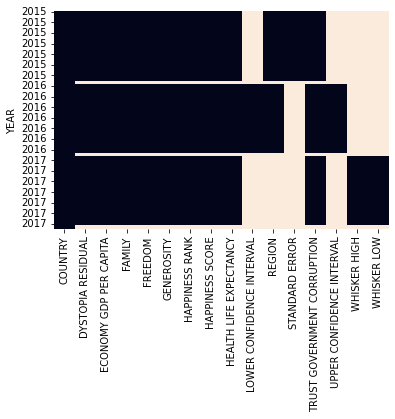

In [292]:
sns.heatmap(combined_updated.isnull(), cbar=False)
plt.show()

In [293]:
regions_2017 = combined[combined['YEAR'] == 2017]['REGION']

In [294]:
missing = regions_2017.isnull().sum()

In [295]:
missing

164

### Using Data From Additional Sources to Fill in Missing Values

In [296]:
regions2015 = happiness2015[['COUNTRY', 'REGION']].copy()
regions2016 = happiness2016[['COUNTRY', 'REGION']].copy()


In [297]:
regions = pd.concat([regions2015, regions2016], ignore_index=True)
regions.dropna(inplace=True)
regions.drop_duplicates(inplace=True)

In [298]:
regions.head()

,COUNTRY,REGION
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America


In [299]:
combined = pd.merge(left=combined, 
                     right=regions, 
                     on='COUNTRY',
                     how='left')

In [300]:
combined.shape

(492, 18)

In [301]:
combined.columns

Index(['COUNTRY', 'DYSTOPIA RESIDUAL', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'FREEDOM', 'GENEROSITY', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'HEALTH LIFE EXPECTANCY', 'LOWER CONFIDENCE INTERVAL', 'REGION_x',
       'STANDARD ERROR', 'TRUST GOVERNMENT CORRUPTION',
       'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 'WHISKER LOW', 'YEAR',
       'REGION_y'],
      dtype='object')

In [302]:
combined = combined.drop('REGION_x', axis=1) 

In [303]:
missing = combined.isnull().sum()

In [304]:
missing

COUNTRY                          0
DYSTOPIA RESIDUAL               22
ECONOMY GDP PER CAPITA          22
FAMILY                          22
FREEDOM                         22
GENEROSITY                      22
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
HEALTH LIFE EXPECTANCY          22
LOWER CONFIDENCE INTERVAL      335
STANDARD ERROR                 334
TRUST GOVERNMENT CORRUPTION     22
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
YEAR                             0
REGION_y                         0
dtype: int64

### Identifying Duplicates Values

In [305]:
combined.columns

Index(['COUNTRY', 'DYSTOPIA RESIDUAL', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'FREEDOM', 'GENEROSITY', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'HEALTH LIFE EXPECTANCY', 'LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR',
       'TRUST GOVERNMENT CORRUPTION', 'UPPER CONFIDENCE INTERVAL',
       'WHISKER HIGH', 'WHISKER LOW', 'YEAR', 'REGION_y'],
      dtype='object')

In [306]:
combined.rename(columns = {'REGION_y':'REGION'}, inplace=True)

In [307]:
combined.columns

Index(['COUNTRY', 'DYSTOPIA RESIDUAL', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'FREEDOM', 'GENEROSITY', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'HEALTH LIFE EXPECTANCY', 'LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR',
       'TRUST GOVERNMENT CORRUPTION', 'UPPER CONFIDENCE INTERVAL',
       'WHISKER HIGH', 'WHISKER LOW', 'YEAR', 'REGION'],
      dtype='object')

In [308]:
dups = combined.duplicated(['COUNTRY', 'YEAR'])

In [309]:
combined[dups]

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION


In [310]:
combined['COUNTRY'] = combined['COUNTRY'].str.upper()

In [311]:
combined.head()

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION
0,SWITZERLAND,2.51738,1.39651,1.34951,0.66557,0.29678,1.0,7.587,0.94143,NaN,0.03411,0.41978,NaN,NaN,NaN,2015,Western Europe
1,ICELAND,2.70201,1.30232,1.40223,0.62877,0.43630,2.0,7.561,0.94784,NaN,0.04884,0.14145,NaN,NaN,NaN,2015,Western Europe
2,DENMARK,2.49204,1.32548,1.36058,0.64938,0.34139,3.0,7.527,0.87464,NaN,0.03328,0.48357,NaN,NaN,NaN,2015,Western Europe
3,NORWAY,2.46531,1.45900,1.33095,0.66973,0.34699,4.0,7.522,0.88521,NaN,0.03880,0.36503,NaN,NaN,NaN,2015,Western Europe
4,CANADA,2.45176,1.32629,1.32261,0.63297,0.45811,5.0,7.427,0.90563,NaN,0.03553,0.32957,NaN,NaN,NaN,2015,North America


In [312]:
dups = combined.duplicated(['COUNTRY', 'YEAR'])

In [313]:
combined[dups]

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,Sub-Saharan Africa
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa


### Correcting Duplicates Values

In [314]:
combined[combined['COUNTRY'] == 'SOMALILAND REGION']

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION
90,SOMALILAND REGION,2.11032,0.18847,0.95152,0.46582,0.50318,91.0,5.057,0.43873,NaN,0.06161,0.39928,NaN,NaN,NaN,2015,Sub-Saharan Africa
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,Sub-Saharan Africa
260,SOMALILAND REGION,2.43801,0.25558,0.75862,0.39130,0.51479,97.0,5.057,0.33108,4.934,NaN,0.36794,5.18,NaN,NaN,2016,Sub-Saharan Africa
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Sub-Saharan Africa
488,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa


In [315]:
combined = combined.drop_duplicates(['COUNTRY', 'YEAR'])

In [316]:
combined[combined['COUNTRY'] == 'SOMALILAND REGION']

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION
90,SOMALILAND REGION,2.11032,0.18847,0.95152,0.46582,0.50318,91.0,5.057,0.43873,NaN,0.06161,0.39928,NaN,NaN,NaN,2015,Sub-Saharan Africa
260,SOMALILAND REGION,2.43801,0.25558,0.75862,0.39130,0.51479,97.0,5.057,0.33108,4.934,NaN,0.36794,5.18,NaN,NaN,2016,Sub-Saharan Africa
488,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa


### Handle Missing Values by Dropping Columns

In [317]:
combined.isnull().sum()

COUNTRY                          0
DYSTOPIA RESIDUAL               19
ECONOMY GDP PER CAPITA          19
FAMILY                          19
FREEDOM                         19
GENEROSITY                      19
HAPPINESS RANK                  19
HAPPINESS SCORE                 19
HEALTH LIFE EXPECTANCY          19
LOWER CONFIDENCE INTERVAL      332
STANDARD ERROR                 331
TRUST GOVERNMENT CORRUPTION     19
UPPER CONFIDENCE INTERVAL      332
WHISKER HIGH                   334
WHISKER LOW                    334
YEAR                             0
REGION                           0
dtype: int64

In [318]:
columns_to_drop = ['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 
                   'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 
                   'WHISKER LOW']

In [319]:
combined_droped = combined.drop(columns_to_drop, axis=1)

In [320]:
missing = combined_droped.isnull().sum()

In [321]:
missing

COUNTRY                         0
DYSTOPIA RESIDUAL              19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
FREEDOM                        19
GENEROSITY                     19
HAPPINESS RANK                 19
HAPPINESS SCORE                19
HEALTH LIFE EXPECTANCY         19
TRUST GOVERNMENT CORRUPTION    19
YEAR                            0
REGION                          0
dtype: int64

In [322]:
combined.notnull().sum().sort_values()

WHISKER LOW                    155
WHISKER HIGH                   155
LOWER CONFIDENCE INTERVAL      157
UPPER CONFIDENCE INTERVAL      157
STANDARD ERROR                 158
HEALTH LIFE EXPECTANCY         470
DYSTOPIA RESIDUAL              470
ECONOMY GDP PER CAPITA         470
FAMILY                         470
FREEDOM                        470
GENEROSITY                     470
HAPPINESS RANK                 470
HAPPINESS SCORE                470
TRUST GOVERNMENT CORRUPTION    470
COUNTRY                        489
YEAR                           489
REGION                         489
dtype: int64

In [323]:
combined_droped = combined.dropna(thresh=159, axis=1).copy()

In [324]:
missing = combined_droped.isnull().sum()

In [325]:
missing

COUNTRY                         0
DYSTOPIA RESIDUAL              19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
FREEDOM                        19
GENEROSITY                     19
HAPPINESS RANK                 19
HAPPINESS SCORE                19
HEALTH LIFE EXPECTANCY         19
TRUST GOVERNMENT CORRUPTION    19
YEAR                            0
REGION                          0
dtype: int64

### Analyzing Missing Data

In [326]:
combined_droped.isnull().sum()

COUNTRY                         0
DYSTOPIA RESIDUAL              19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
FREEDOM                        19
GENEROSITY                     19
HAPPINESS RANK                 19
HAPPINESS SCORE                19
HEALTH LIFE EXPECTANCY         19
TRUST GOVERNMENT CORRUPTION    19
YEAR                            0
REGION                          0
dtype: int64

In [327]:
sorted = combined_droped.set_index('REGION').sort_values(['REGION', 'HAPPINESS SCORE'])

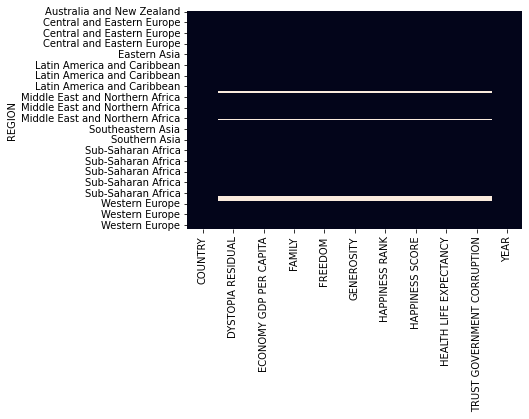

In [328]:
sns.heatmap(sorted.isnull(), cbar=False)
plt.show()

### Handling Missing Values with Imputation

In [329]:
happiness_mean = combined_droped['HAPPINESS SCORE'].mean()

In [330]:
happiness_mean

5.370727659882893

In [331]:
combined_droped['HAPPINESS SCORE UPDATED'] = combined_droped['HAPPINESS SCORE'].fillna(happiness_mean)

In [332]:
combined_droped['HAPPINESS SCORE UPDATED'].mean()


5.370727659882894

(0.0, 100.0)

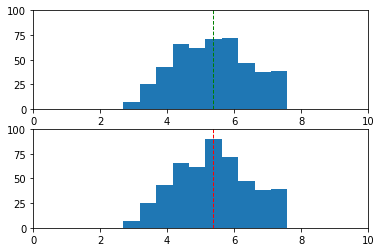

In [333]:
fig,ax=plt.subplots(2,1)
ax[0].hist(combined_droped['HAPPINESS SCORE'])
ax[0].axvline(combined_droped['HAPPINESS SCORE'].mean(), color='g', linestyle='dashed', linewidth=1)
ax[1].hist(combined_droped['HAPPINESS SCORE UPDATED'])
ax[1].axvline(combined_droped['HAPPINESS SCORE UPDATED'].mean(), color='r', linestyle='dashed', linewidth=1)

ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,100])
ax[1].set_ylim([0,100])

### Dropping Rows

In [334]:
combined_droped.pivot_table(index='REGION',
                           values='HAPPINESS SCORE',
                           margins=True)

,HAPPINESS SCORE
REGION,
Australia and New Zealand,7.302500
Central and Eastern Europe,5.371184
Eastern Asia,5.632333
Latin America and Caribbean,6.069074
Middle East and Northern Africa,5.387879
North America,7.227167
Southeastern Asia,5.364077
Southern Asia,4.590857
Sub-Saharan Africa,4.150957


In [335]:
combined_droped = combined_droped.dropna()

In [336]:
missing = combined_droped.isnull().sum()

In [337]:
missing

COUNTRY                        0
DYSTOPIA RESIDUAL              0
ECONOMY GDP PER CAPITA         0
FAMILY                         0
FREEDOM                        0
GENEROSITY                     0
HAPPINESS RANK                 0
HAPPINESS SCORE                0
HEALTH LIFE EXPECTANCY         0
TRUST GOVERNMENT CORRUPTION    0
YEAR                           0
REGION                         0
HAPPINESS SCORE UPDATED        0
dtype: int64

## Identifying Hidden Missing Data

### Primer: Happiness 2015

In [338]:
happiness2015 = pd.read_csv('data/wh_2015_special.csv')

In [339]:
happiness2015.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

In [340]:
h_2015 = happiness2015['Region'].unique()
# Print the sorted values
np.sort(h_2015)

array(['.', 'Australia and New Zealand', 'Central and Eastern Europe',
       'Eastern Asia', 'Latin America and Caribbean',
       'Middle East and Northern Africa', 'North America',
       'Southeastern Asia', 'Southern Asia', 'Sub-Saharan Africa',
       'Western Europe'], dtype=object)

Vidimo, da nekatere vrednsti imajo piko.

In [341]:
happiness2015[happiness2015['Region'] == '.']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,.,?,.,.,.,.,.,.,.,.,.,2015
159,Namibia,.,?,.,.,.,.,.,.,.,.,.,2015
160,Puerto Rico,.,?,.,.,.,.,.,.,.,.,.,2015
161,Somalia,.,?,.,.,.,.,.,.,.,.,.,2015
162,Somaliland Region,.,?,.,.,.,.,.,.,.,.,.,2015
163,South Sudan,.,?,.,.,.,.,.,.,.,.,.,2015


In [342]:
# Preberemo še enkrat, da se rešimo manjkajočih vrednosti
happiness2015 = pd.read_csv('data/wh_2015_special.csv', na_values='.')

In [343]:
happiness2015.isnull().sum()

Country                          0
Region                           6
Happiness Rank                   0
Happiness Score                  6
Standard Error                   6
Economy (GDP per Capita)         6
Family                           6
Health (Life Expectancy)         6
Freedom                          6
Trust (Government Corruption)    6
Generosity                       6
Dystopia Residual                6
Year                             0
dtype: int64

In [344]:
happiness2015[happiness2015['Region'].isnull()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
159,Namibia,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
160,Puerto Rico,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
161,Somalia,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
162,Somaliland Region,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
163,South Sudan,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


In [345]:
# nadomestimo še ? z NaN
happiness2015.replace('?', np.nan, inplace=True)

In [346]:
happiness2015[happiness2015['Region'].isnull()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
159,Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
160,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
161,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
162,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
163,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


### Primer: Diabetes

In [347]:
diabetes = pd.read_csv('data/pima-indians-diabetes_data.csv')

In [348]:
diabetes.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [349]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    float64
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                768 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [350]:
diabetes.describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [351]:
# Store all rows of column 'BMI' which are equal to 0 
zero_bmi = diabetes.loc[diabetes['BMI'] == 0, 'BMI']

In [352]:
zero_bmi

9      0.0
49     0.0
60     0.0
81     0.0
145    0.0
371    0.0
426    0.0
494    0.0
522    0.0
684    0.0
706    0.0
Name: BMI, dtype: float64

In [353]:
# Set the 0 values of column 'BMI' to np.nan
diabetes.loc[diabetes['BMI'] == 0, 'BMI'] = np.nan

In [354]:
# Print the 'NaN' values in the column BMI
diabetes.loc[diabetes['BMI'].isnull(), 'BMI']

9     NaN
49    NaN
60    NaN
81    NaN
145   NaN
371   NaN
426   NaN
494   NaN
522   NaN
684   NaN
706   NaN
Name: BMI, dtype: float64

#### Analyzing missingness percentage

In [355]:
# Create a nullity DataFrame airquality_nullity
diabetes_nullity = diabetes.isnull()
# Calculate total of missing values
missing_values_sum = diabetes_nullity.sum()
print('Total Missing Values:\n', missing_values_sum)

Total Missing Values:
 Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64


In [356]:
# Calculate percentage of missing values
missing_values_percent = missing_values_sum/diabetes.shape[0] * 100
print('Percentage of Missing Values:\n', missing_values_percent)

Percentage of Missing Values:
 Pregnant              0.000000
Glucose               0.651042
Diastolic_BP          4.557292
Skin_Fold            29.557292
Serum_Insulin        48.697917
BMI                   1.432292
Diabetes_Pedigree     0.000000
Age                   0.000000
Class                 0.000000
dtype: float64


## Andvance Visualization of Missing Data

In [378]:
#! pip install missingno

In [358]:
# Import missingno as msno
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

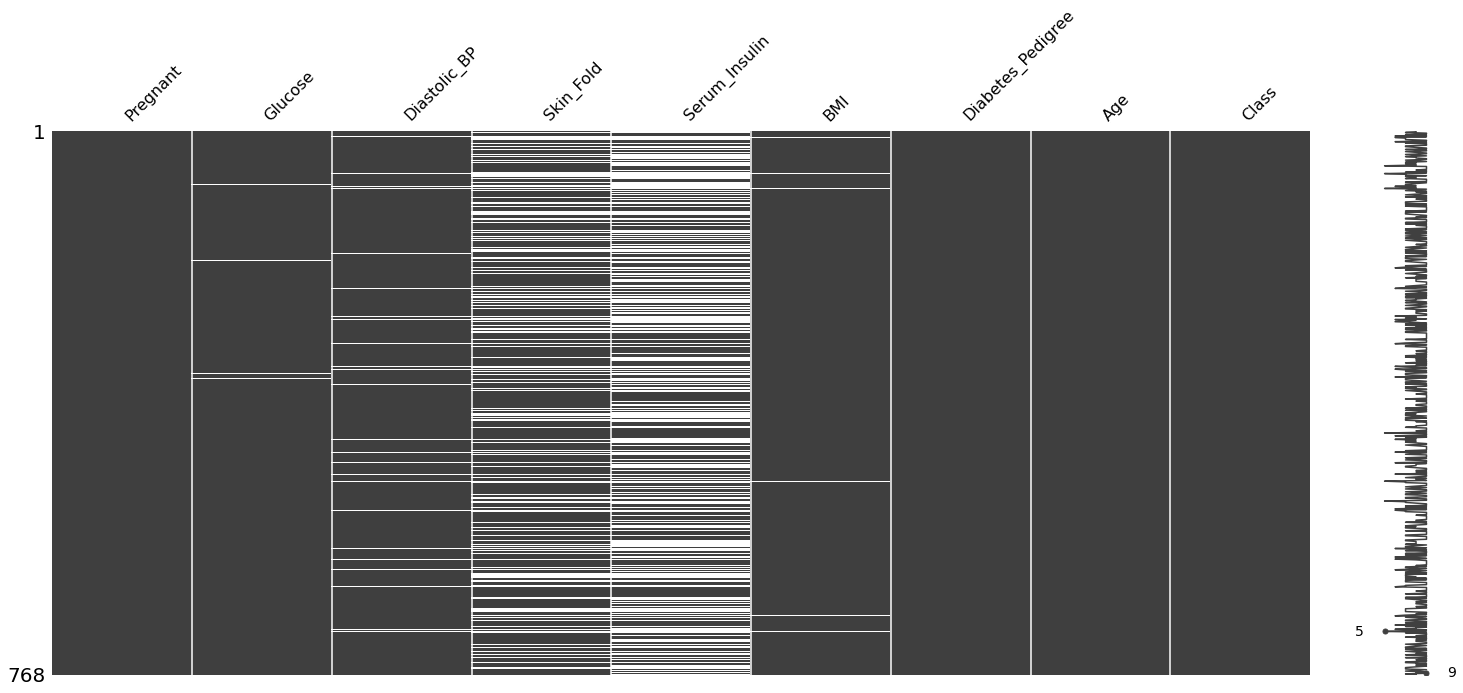

In [359]:
# Visualize the missingness summary
msno.matrix(diabetes)

# Display nullity matrix
plt.show()

### Missingness Patterns

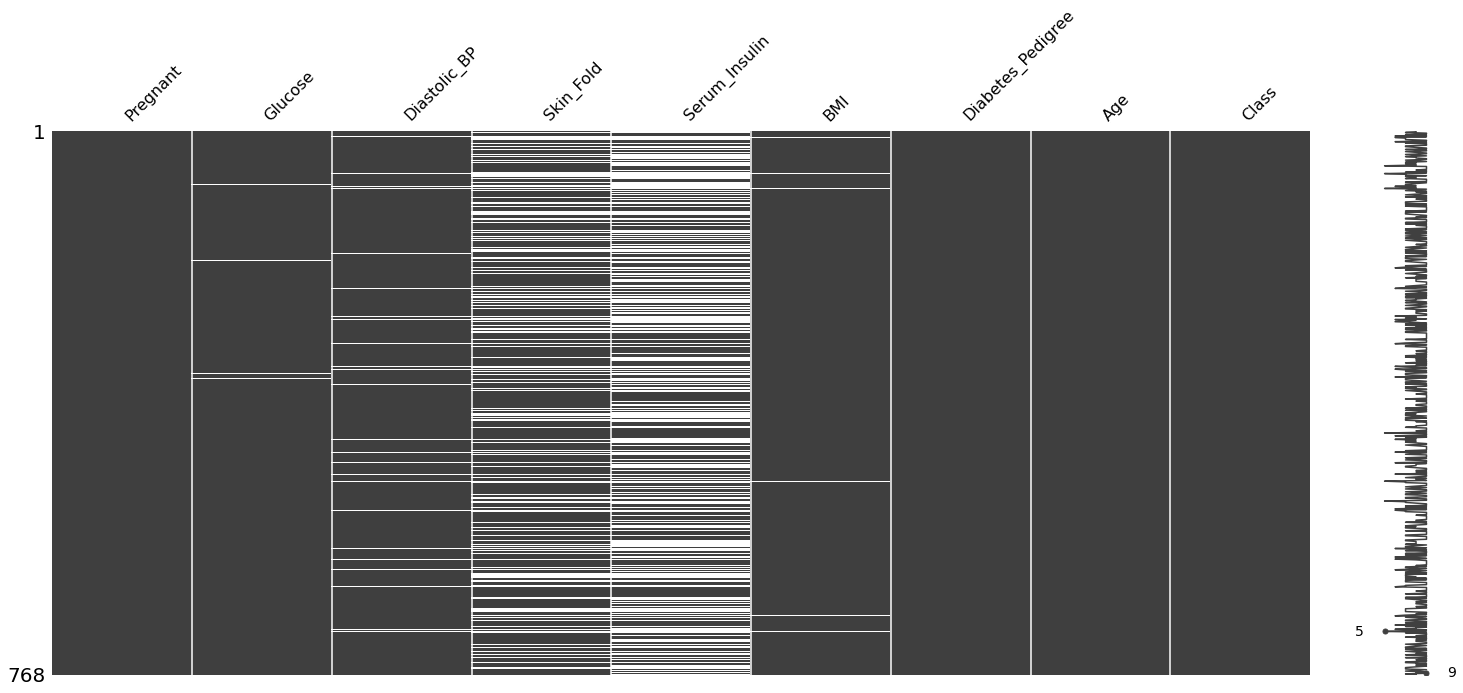

In [360]:
# Visualize the missingness summary
msno.matrix(diabetes)

# Display nullity matrix
plt.show()

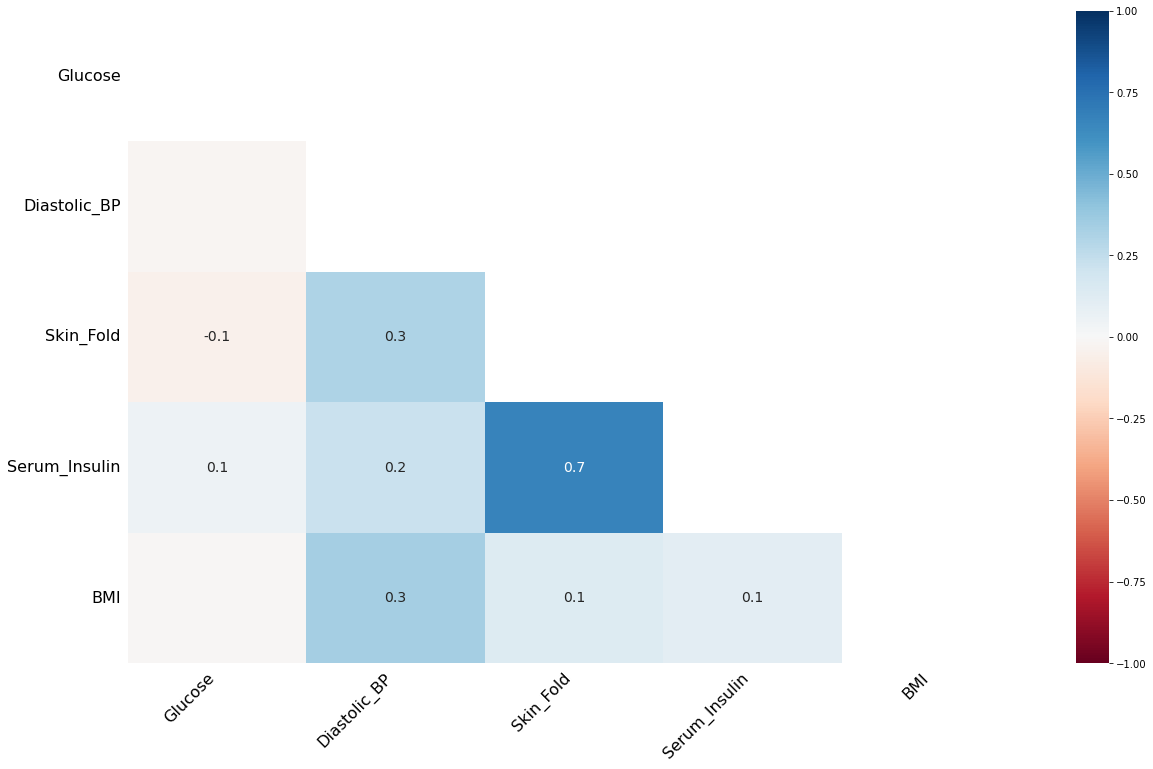

In [361]:
# Plot missingness heatmap of diabetes
msno.heatmap(diabetes)
# Show plot
plt.show()

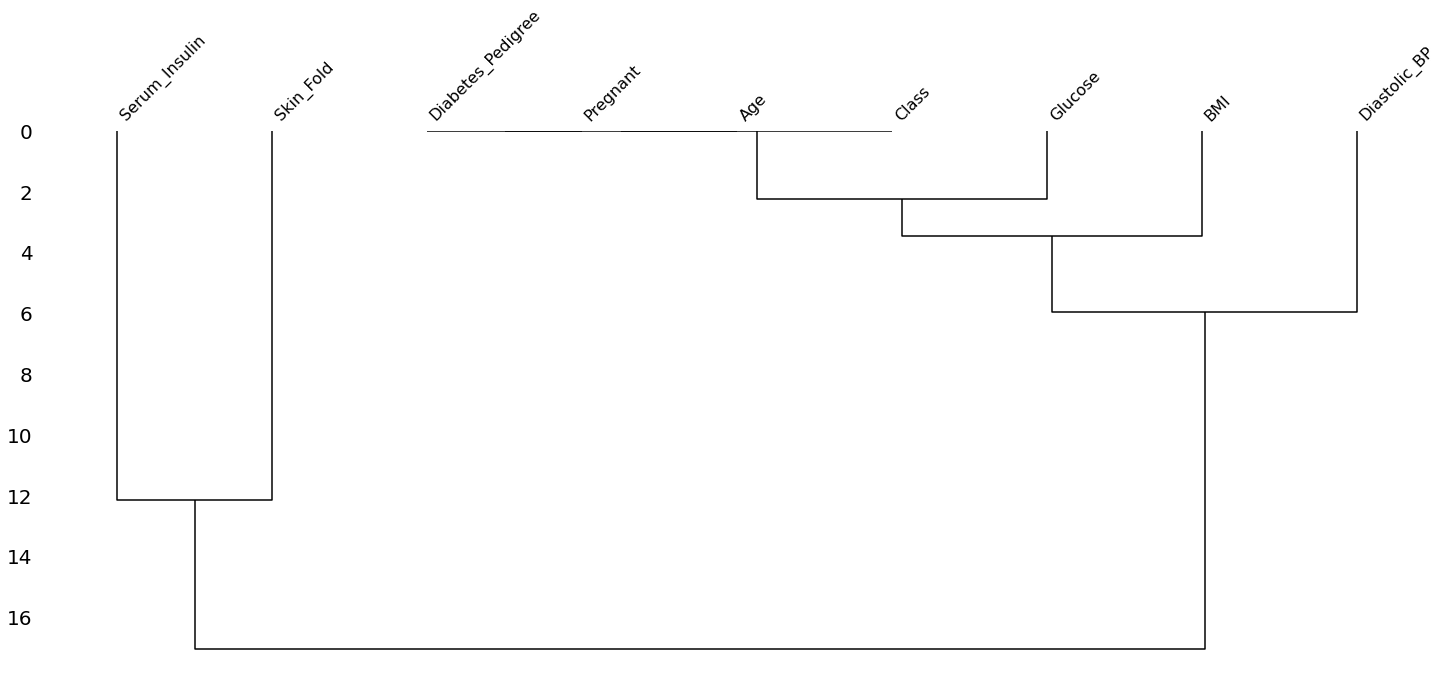

In [362]:
# Plot missingness dendrogram of diabetes
msno.dendrogram(diabetes)

# Show plot
plt.show()

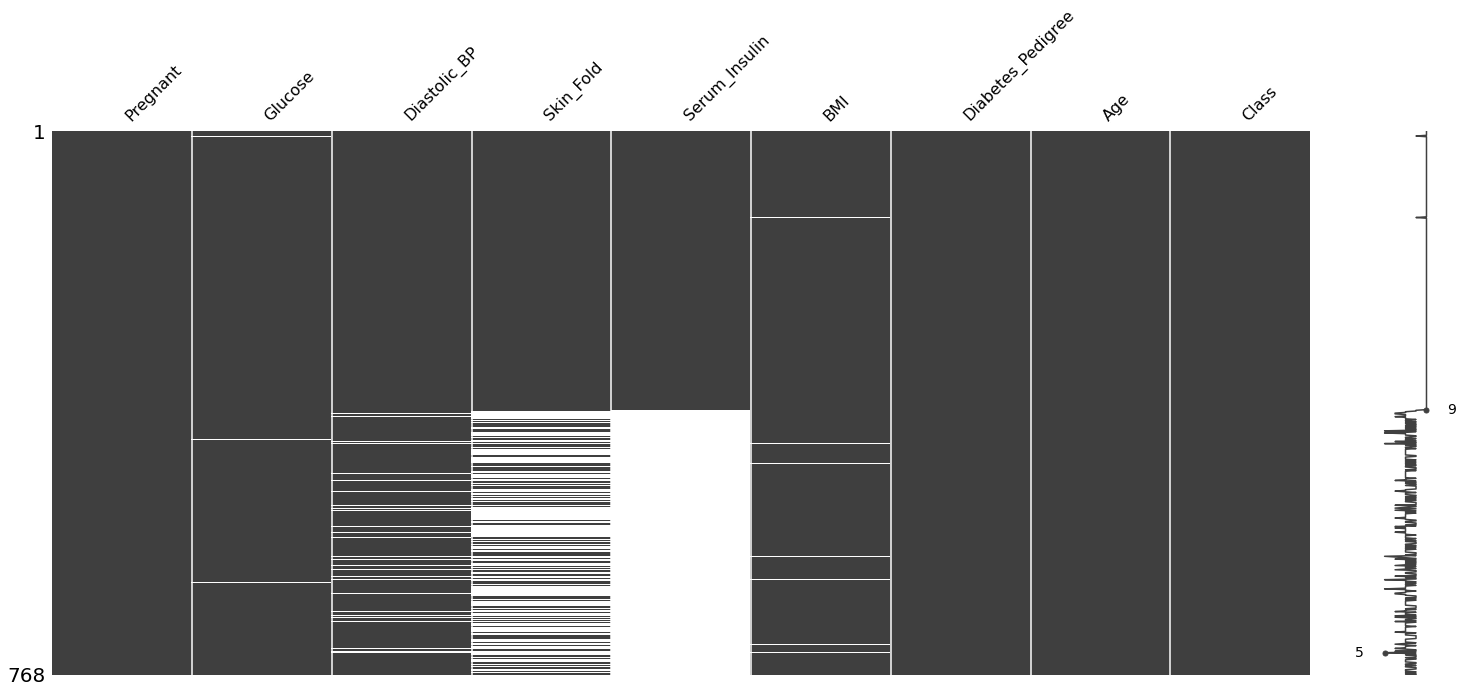

In [363]:
# Sort diabetes dataframe on 'Serum Insulin'
sorted_values = diabetes.sort_values('Serum_Insulin')

# Visualize the missingness summary of sorted
msno.matrix(sorted_values)

# Display nullity matrix
plt.show()

## Handle Missing Values

### Dropping Rows

In [364]:
# Print the number of missing values in Glucose
print(diabetes['Glucose'].isnull().sum())

5


In [365]:
# Drop all rows where 'Glucose' has a missing value
diabetes.dropna(subset=['Glucose'], how='all', inplace=True)

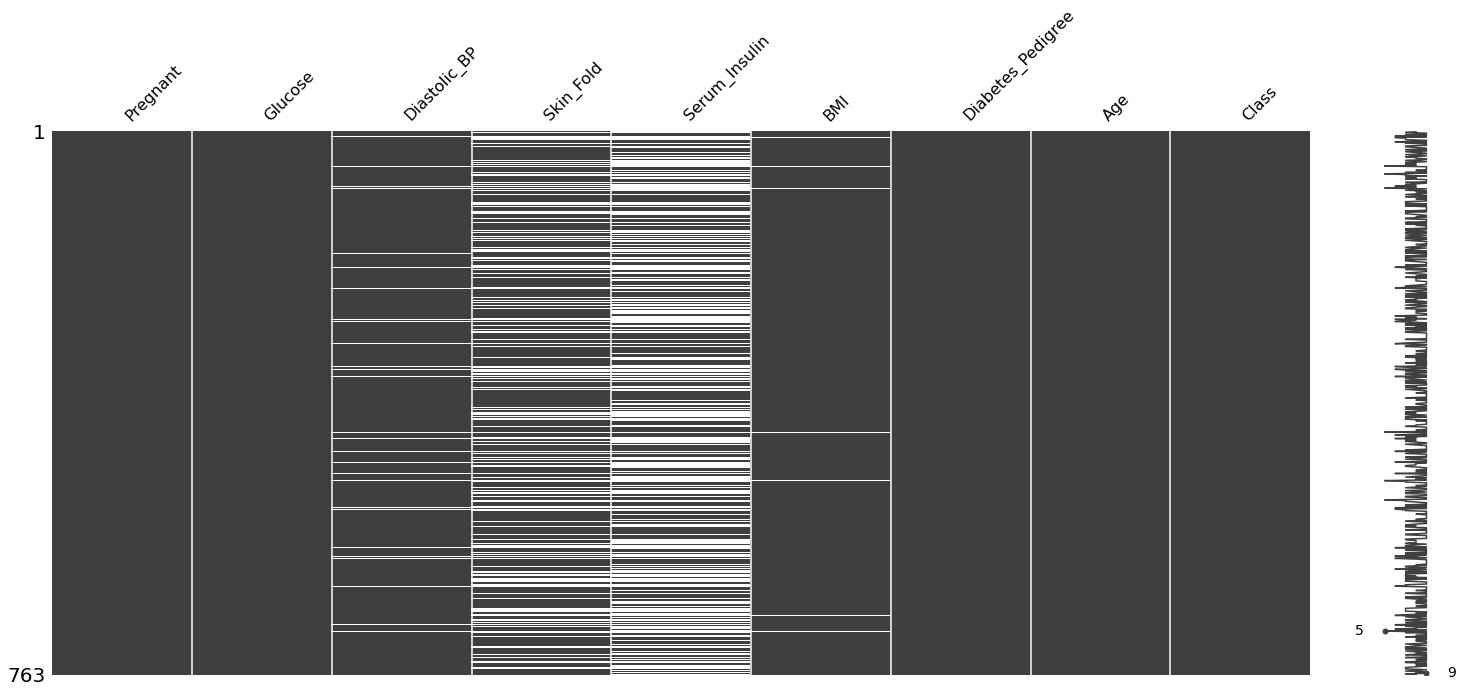

In [366]:
# Visualize the missingness of diabetes after-dropping missing values
msno.matrix(diabetes)
plt.show()

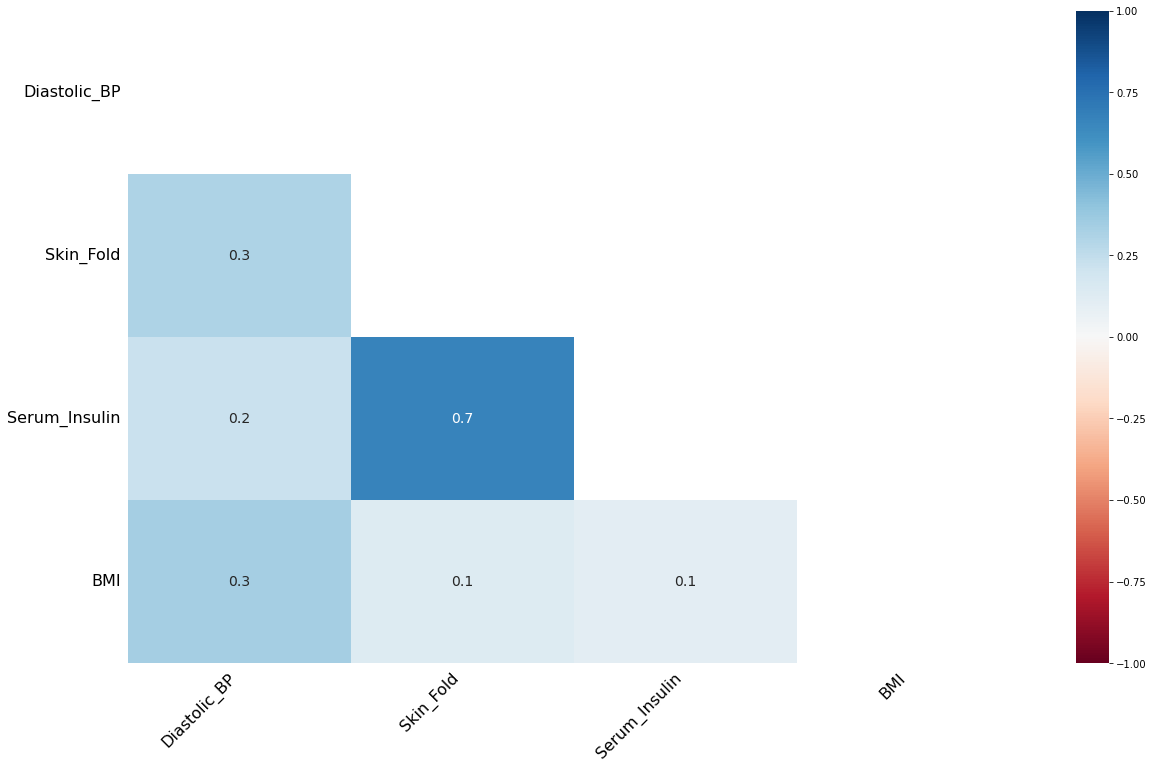

In [367]:
# Visualize the correlation of missingness between variables
msno.heatmap(diabetes)

# Show heatmap
plt.show()

In [368]:

# Drop rows where 'BMI' has a missing value
diabetes.dropna(subset=['BMI'], how='all', inplace=True)


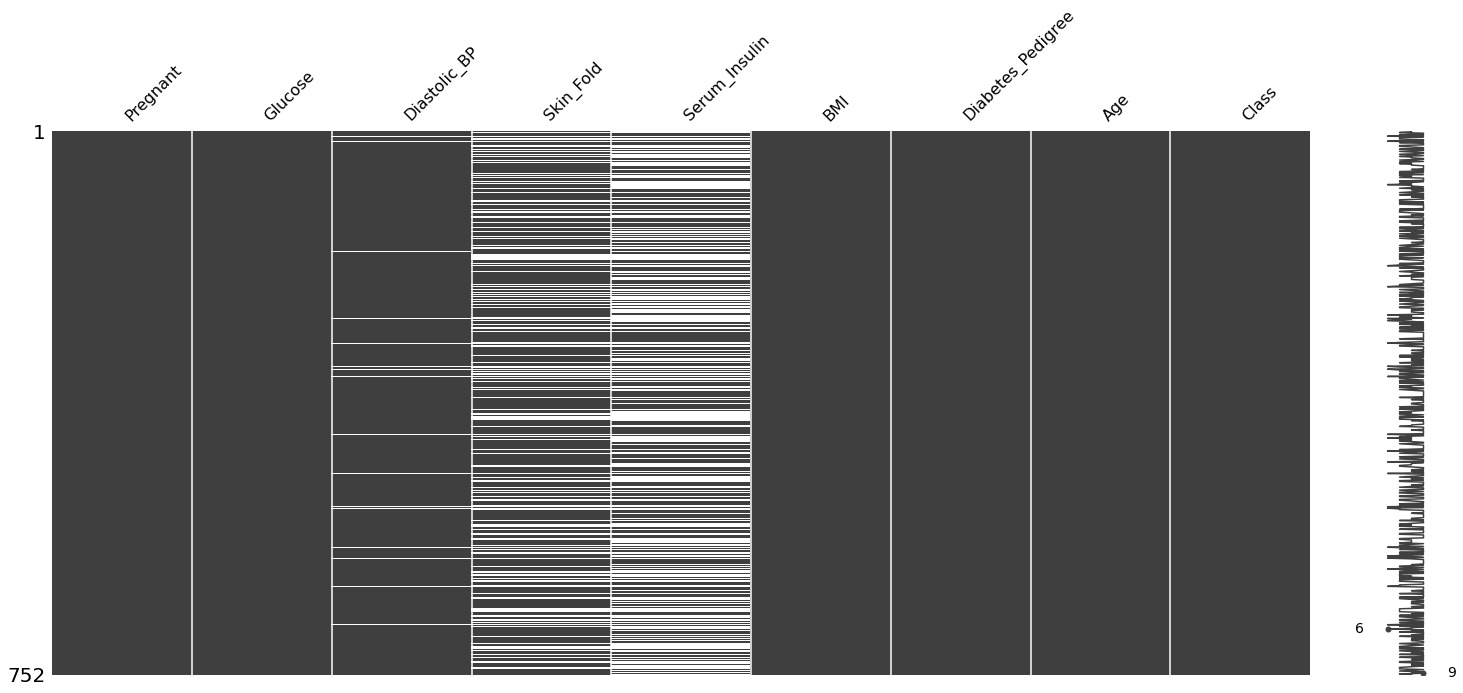

In [369]:
# Visualize the missingness in the data
msno.matrix(diabetes)
plt.show()

### Imputation Techniques

#### Mean & median imputation


In [370]:
from sklearn.impute import SimpleImputer

In [371]:
# Make a copy of diabetes
diabetes_mean = diabetes.copy(deep=True)

# Create mean imputer object
mean_imputer = SimpleImputer(strategy='mean')

# Impute mean values in the DataFrame diabetes_mean
diabetes_mean.iloc[:, :] = mean_imputer.fit_transform(diabetes_mean)

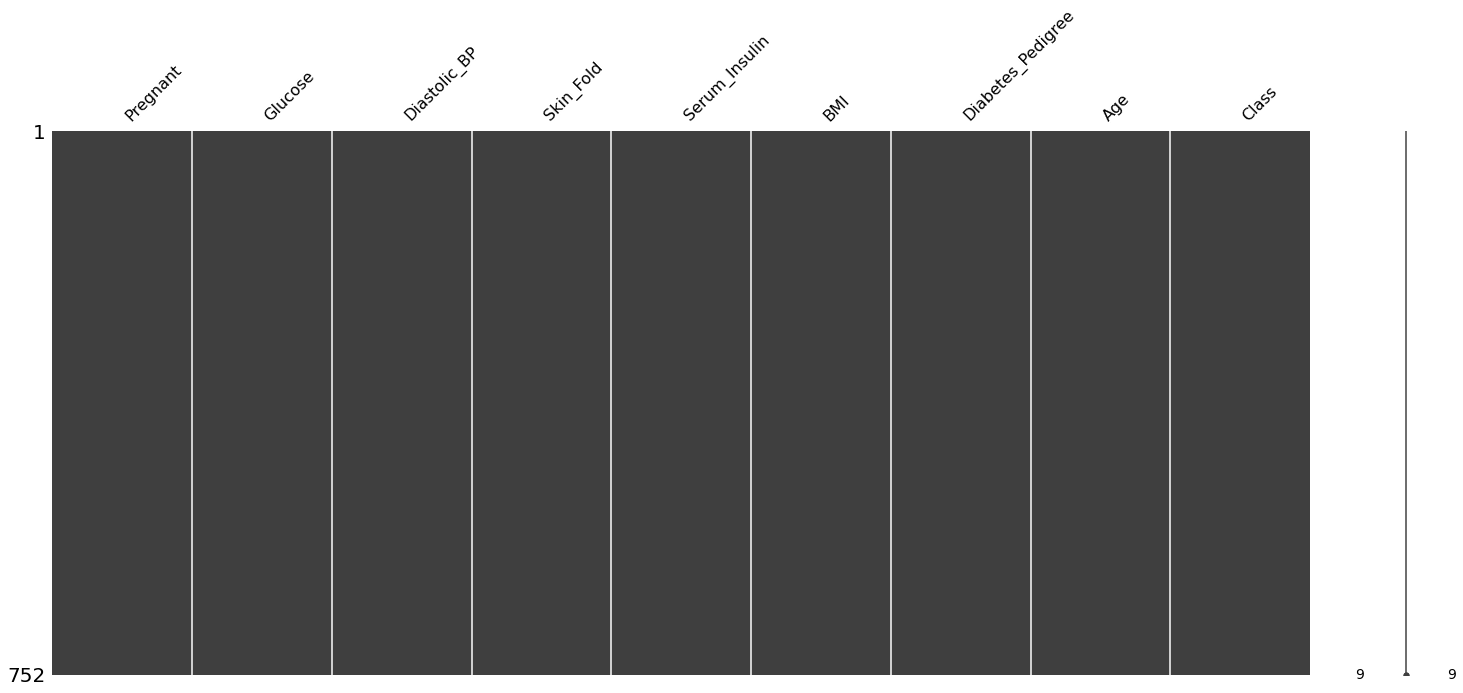

In [372]:
# Visualize the missingness in the data
msno.matrix(diabetes_mean)
plt.show()

In [373]:
# Make a copy of diabetes
diabetes_median = diabetes.copy(deep=True)

# Create median imputer object
median_imputer = SimpleImputer(strategy='median')

# Impute median values in the DataFrame diabetes_median
diabetes_median.iloc[:, :] = median_imputer.fit_transform(diabetes_median)

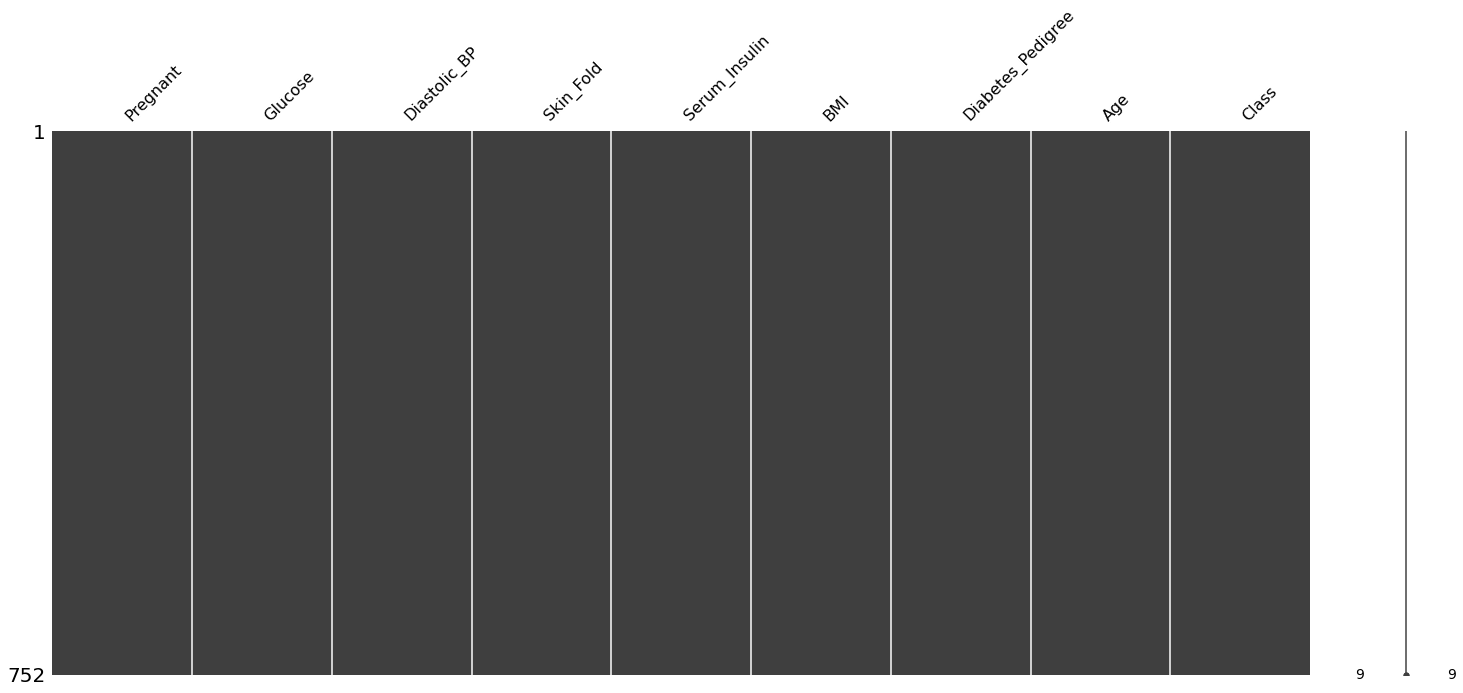

In [374]:
# Visualize the missingness in the data
msno.matrix(diabetes_median)
plt.show()

#### Mode and constant imputation

In [375]:
# Make a copy of diabetes
diabetes_mode = diabetes.copy(deep=True)

# Create mode imputer object
mode_imputer = SimpleImputer(strategy='most_frequent')

# Impute using most frequent value in the DataFrame mode_imputer
diabetes_mode.iloc[:, :] = mode_imputer.fit_transform(diabetes_mode)

In [376]:
# Make a copy of diabetes
diabetes_constant = diabetes.copy(deep=True)

# Create median imputer object
constant_imputer = SimpleImputer(strategy='constant', fill_value=0)

# Impute missing values to 0 in diabetes_constant
diabetes_constant.iloc[:, :] = constant_imputer.fit_transform(diabetes_constant)

#### Visualize imputations

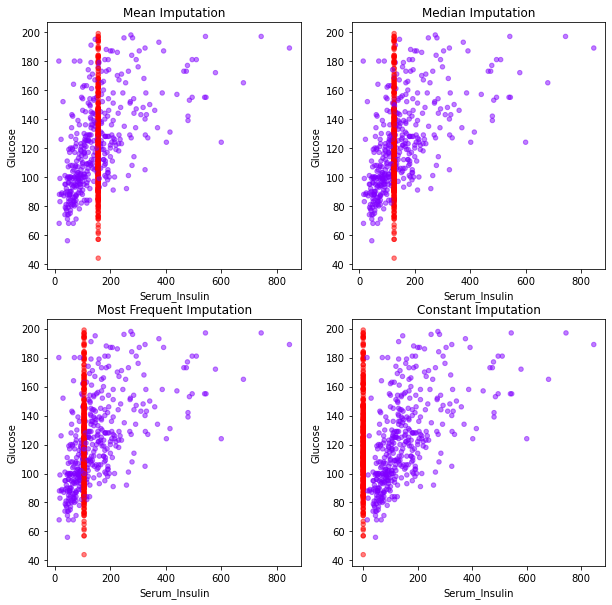

In [377]:
# Set nrows and ncols to 2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
nullity = diabetes['Serum_Insulin'].isnull() | diabetes['Glucose'].isnull()

# Create a dictionary of imputations
imputations = {'Mean Imputation': diabetes_mean, 'Median Imputation': diabetes_median, 
               'Most Frequent Imputation': diabetes_mode, 'Constant Imputation': diabetes_constant}

# Loop over flattened axes and imputations
for ax, df_key in zip(axes.flatten(), imputations):
    # Select and also set the title for a DataFrame
    imputations[df_key].plot(x='Serum_Insulin', y='Glucose', kind='scatter', 
                          alpha=0.5, c=nullity, cmap='rainbow', ax=ax, 
                          colorbar=False, title=df_key)
plt.show()
